In [1]:
import numpy as np 
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score, f1_score, recall_score, precision_score


from sklearn.model_selection import RandomizedSearchCV

In [2]:
import os
os.chdir("C:/Users/DSS4167/Desktop/analytics vidya/hackathon")

In [85]:
df_train=pd.read_csv('traindata.csv')
df_test=pd.read_csv('testdata.csv')

In [86]:
df_train.head(5)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,15.0,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,15.0,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [87]:
df_trainv1=df_train.drop(['ID'], axis=1)


In [88]:
df_testv1=df_test.drop(['ID'], axis=1)

In [89]:
df_trainv1.isna().sum()
train=df_trainv1

In [90]:
df_testv1.isna().sum()
test=df_testv1

In [91]:
from sklearn.preprocessing import LabelEncoder

# I do this manually to explicitly tell the model that a better education & experience serves well as a trustworthy input. 
accom_dict = {'Owned' : 1,
             'Rented': 0}

reco_insu_dict = {'Individual' : 0,
             'Joint' : 1}

spouse_dict = {'No' : 0,
             'Yes' : 1}

In [92]:
health_ind_dict={'X1':1,'X2':2,'X3':3,'X4':4,'X5':5,'X6':6,'X7':7,'X8':8,'X9':9}

In [93]:
# Train encoding
le = LabelEncoder()
train['Accomodation_Type'] = train['Accomodation_Type'].map(accom_dict)
train['Reco_Insurance_Type'] = train['Reco_Insurance_Type'].map(reco_insu_dict)
train['Is_Spouse'] = train['Is_Spouse'].map(spouse_dict)
train['Health Indicator'] = train['Health Indicator'].map(health_ind_dict)

In [94]:
train1 = pd.get_dummies(train, columns=['City_Code'])

In [95]:
# Test encoding
le = LabelEncoder()
test['Accomodation_Type'] = test['Accomodation_Type'].map(accom_dict)
test['Reco_Insurance_Type'] = test['Reco_Insurance_Type'].map(reco_insu_dict)
test['Is_Spouse'] = test['Is_Spouse'].map(spouse_dict)
test['Health Indicator'] = test['Health Indicator'].map(health_ind_dict)

In [96]:
test1 = pd.get_dummies(test, columns=['City_Code'])

In [97]:
#Imputing methods
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge

In [98]:
imputer = IterativeImputer(KNeighborsRegressor(n_neighbors=15))

In [99]:
train1.head(1)

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,...,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9
0,3213,0,0,36,36,0,1.0,15.0,3.0,22,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# impute train data and convert using Knear
train_knear = pd.DataFrame(np.round(imputer.fit_transform(train1)),columns = train1.columns)
train_knear.head(5)

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,...,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9
0,3213.0,0.0,0.0,36.0,36.0,0.0,1.0,15.0,3.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1117.0,1.0,1.0,75.0,22.0,0.0,2.0,9.0,3.0,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3732.0,1.0,0.0,32.0,32.0,0.0,2.0,1.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4378.0,1.0,1.0,52.0,48.0,0.0,1.0,15.0,3.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2190.0,0.0,0.0,44.0,44.0,0.0,2.0,3.0,1.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [135]:
test_knear = pd.DataFrame(np.round(imputer.fit_transform(test1)),columns = test1.columns)

In [23]:
imputer = IterativeImputer(BayesianRidge())
# impute train data and convert using bayesian
train_extrabayesian= pd.DataFrame(np.round(imputer.fit_transform(train1)),columns = train1.columns)

In [28]:
# impute train data and convert 
test_Knear = pd.DataFrame(np.round(imputer.fit_transform(test1)),columns = test1.columns)
# impute test data and convert using bayesian
test_extrabayesian = pd.DataFrame(np.round(imputer.fit_transform(test1)),columns = test1.columns)

In [125]:
#code logic
X = train_knear.drop(labels=['Response'], axis=1)
y = train_knear['Response'].values


In [136]:
# copy the data 
df_min_max_scaled = test_knear.copy() 

df_min_max_scaled.columns

Index(['Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age',
       'Lower_Age', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'City_Code_C1', 'City_Code_C10', 'City_Code_C11', 'City_Code_C12',
       'City_Code_C13', 'City_Code_C14', 'City_Code_C15', 'City_Code_C16',
       'City_Code_C17', 'City_Code_C18', 'City_Code_C19', 'City_Code_C2',
       'City_Code_C20', 'City_Code_C21', 'City_Code_C22', 'City_Code_C23',
       'City_Code_C24', 'City_Code_C25', 'City_Code_C26', 'City_Code_C27',
       'City_Code_C28', 'City_Code_C29', 'City_Code_C3', 'City_Code_C30',
       'City_Code_C31', 'City_Code_C32', 'City_Code_C33', 'City_Code_C34',
       'City_Code_C35', 'City_Code_C36', 'City_Code_C4', 'City_Code_C5',
       'City_Code_C6', 'City_Code_C7', 'City_Code_C8', 'City_Code_C9'],
      dtype='object')

In [137]:
# apply normalization techniques by Column 1 
column = 'Reco_Policy_Premium'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

# view normalized data 
display(df_min_max_scaled) 


,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,...,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9
0,156.0,1.0,0.0,30.0,30.0,0.0,2.0,6.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,1.0,1.0,69.0,68.0,1.0,1.0,3.0,3.0,18.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,564.0,0.0,0.0,28.0,28.0,0.0,3.0,2.0,4.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1177.0,0.0,0.0,23.0,23.0,0.0,3.0,3.0,3.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,951.0,1.0,0.0,75.0,75.0,0.0,3.0,8.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,1044.0,1.0,0.0,45.0,45.0,0.0,1.0,4.0,1.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21801,266.0,1.0,0.0,59.0,59.0,0.0,5.0,6.0,3.0,18.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21802,2470.0,1.0,0.0,74.0,74.0,0.0,3.0,8.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21803,1676.0,0.0,0.0,25.0,25.0,0.0,4.0,3.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
# apply normalization techniques by Column 1 
column = 'Upper_Age'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())




In [139]:
# apply normalization techniques by Column 1 
column = 'Lower_Age'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())




In [140]:
test_knear=df_min_max_scaled

In [141]:
X.head(5)

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,...,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9
0,3213.0,0.0,0.0,0.315789,0.338983,0.0,1.0,15.0,3.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1117.0,1.0,1.0,1.000000,0.101695,0.0,2.0,9.0,3.0,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3732.0,1.0,0.0,0.245614,0.271186,0.0,2.0,1.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4378.0,1.0,1.0,0.596491,0.542373,0.0,1.0,15.0,3.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2190.0,0.0,0.0,0.456140,0.474576,0.0,2.0,3.0,1.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [142]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=42)

In [107]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((43249, 47), (43249,), (7633, 47), (7633,))

In [108]:
X_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
46707,0.495882,1.0,0.0,0.789474,0.796610,0.0,0.125,0.071429,0.666667,0.809524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50811,0.496690,1.0,1.0,0.684211,0.677966,1.0,0.000,0.642857,0.666667,0.095238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2564,0.803972,0.0,0.0,0.157895,0.186441,0.0,0.250,0.357143,0.333333,0.904762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7982,0.017923,0.0,0.0,0.017544,0.050847,0.0,0.375,0.214286,0.333333,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18494,0.349427,1.0,0.0,0.754386,0.762712,0.0,0.250,1.000000,0.000000,0.714286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
from math import sqrt 
from sklearn.metrics import roc_auc_score


In [110]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'num_leaves':20,
         'boosting': 'dart',  
         'metric': 'mae',
         'learning_rate': 0.01, 
         'num_iterations': 1000,
         'num_leaves': 80,
         'max_depth': 6,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 142,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('roc_auc_score:', roc_auc_score(y_cv,y_pred_lgbm))

C:\Users\DSS4167\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\DSS4167\Anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 746
[LightGBM] [Info] Number of data points in the train set: 43249, number of used features: 47
[LightGBM] [Info] Start training from score 0.239243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

C:\Users\DSS4167\Anaconda3\lib\site-packages\lightgbm\callback.py:186: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[700]	valid_0's l1: 0.332

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[800]	valid_0's l1: 0.333034
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

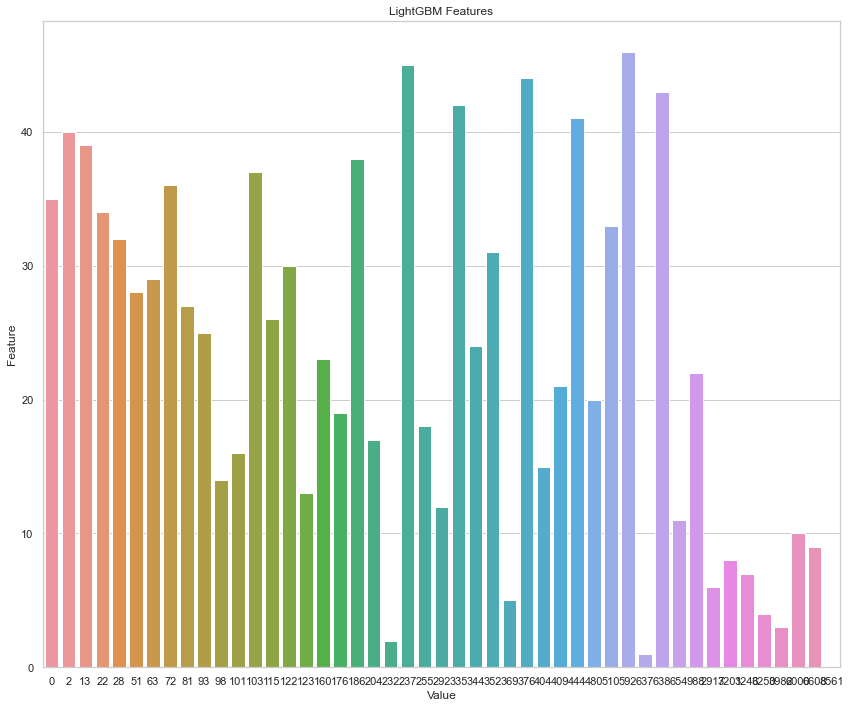

In [111]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [143]:
Xtest = test_knear

In [148]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=
             30, shuffle=True, random_state=101)
for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(boosting_type='gbdt', learning_rate=0.1, n_estimators=1000, random_state=101, subsample=0.9)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)

    y_pred_lgbm = lgbm.predict(X_test)
    print("roc_auc_score: ", roc_auc_score(y_test, y_pred_lgbm))

    errlgb.append(roc_auc_score(y_test, y_pred_lgbm))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)


roc_auc_score:  0.6691629322769408
roc_auc_score:  0.7009027557808046
roc_auc_score:  0.6772165642656212
roc_auc_score:  0.6915351215355273
roc_auc_score:  0.6840834452903418
roc_auc_score:  0.6856898874013788
roc_auc_score:  0.6543855784410911
roc_auc_score:  0.656327997572355
roc_auc_score:  0.6712261809294688
roc_auc_score:  0.666574387701928
roc_auc_score:  0.703142539969083
roc_auc_score:  0.6733923076503636
roc_auc_score:  0.6832406164668857
roc_auc_score:  0.6555135529620445
roc_auc_score:  0.6733901574433454
roc_auc_score:  0.6759056341168962
roc_auc_score:  0.6578348736572983
roc_auc_score:  0.6773682574706961
roc_auc_score:  0.6674818983010236
roc_auc_score:  0.6869639515790278
roc_auc_score:  0.664117555878172
roc_auc_score:  0.6874938677280511
roc_auc_score:  0.6941894534773793
roc_auc_score:  0.6754241814623344
roc_auc_score:  0.6734514281379206
roc_auc_score:  0.6816631721581721
roc_auc_score:  0.6933943873930775
roc_auc_score:  0.6798065370976566
roc_auc_score:  0.664890

<generator object _BaseKFold.split at 0x000001F683A03DD0>

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [56]:
print(y_pred_totlgb)

[]


In [149]:
lgbm_final = np.mean(y_pred_totlgb,0)


In [150]:
submission = pd.DataFrame({
        "ID": df_test['ID'],
        "Response": lgbm_final
    })
submission.to_csv('submissionv7.csv', index=False)
print(submission)

          ID  Response
0      50883  0.251135
1      50884  0.205594
2      50885  0.294044
3      50886  0.225182
4      50887  0.194776
...      ...       ...
21800  72683  0.230471
21801  72684  0.212537
21802  72685  0.032351
21803  72686  0.214494
21804  72687  0.161393

[21805 rows x 2 columns]
